In [2]:
import numpy as np
import keras
import tensorflow
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
train_path = "data/train"
test_path = "data/test"

In [6]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, 
                                                        target_size = (256, 256), 
                                                        classes = ['bear', 'deer', 'wolf'], 
                                                        batch_size = 3)

test_batches = ImageDataGenerator().flow_from_directory(test_path, 
                                                        target_size = (256, 256), 
                                                        classes = ['bear', 'deer', 'wolf'], 
                                                        batch_size = 13)

Found 33 images belonging to 3 classes.
Found 13 images belonging to 3 classes.


In [7]:
imgs, labels = next(train_batches)

/Users/dominik/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


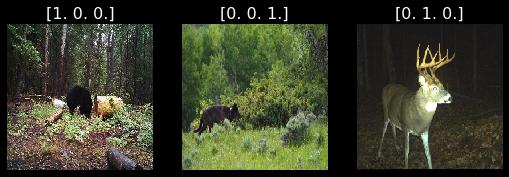

In [8]:
plots(imgs, titles=labels)

<h3> Training and testing custom made CNN, just to check how it will behave with such a small dataset <h3>

In [9]:
model = Sequential([
    Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (256, 256, 3)),
    Flatten(),
    Dense(3, activation = 'softmax')
])

In [10]:
model.compile(Adam(), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

In [11]:
model.fit_generator(train_batches, 
                    steps_per_epoch = 4,
                    epochs = 3,
                    verbose = 2)

<ipython-input-11-cf09aa597fad>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batches,


Epoch 1/3
4/4 - 1s - loss: 33973.0898 - accuracy: 0.2500 - 1s/epoch - 336ms/step
Epoch 2/3
4/4 - 0s - loss: 14946.0381 - accuracy: 0.4167 - 383ms/epoch - 96ms/step
Epoch 3/3
4/4 - 1s - loss: 13567.4805 - accuracy: 0.1667 - 542ms/epoch - 136ms/step


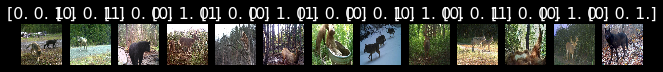

In [12]:
test_images, test_labels = next(test_batches)
plots(test_images, titles= test_labels)

In [13]:
predictions = model.predict_generator(test_batches, steps = 1, verbose = 2)

<ipython-input-13-8bf9a199090b>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_batches, steps = 1, verbose = 2)


1/1 - 0s - 236ms/epoch - 236ms/step


In [14]:
predictions

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

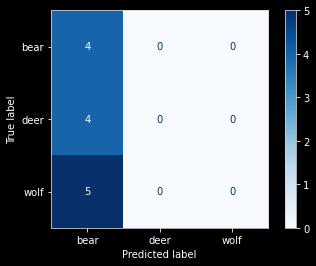

In [15]:
cm = confusion_matrix(test_labels.argmax(axis = 1), predictions.argmax(axis = 1))
cm_plot_labels = ["bear", "deer", "wolf"]

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = cm_plot_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

<h3> Using transfer learning to predict <h3>

In [ ]:
test